## **Implementación de Transferencia de Aprendizaje**


## **1. Importación de las bibliotecas necesarias**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

### **Ruta de los datos de entrenamiento y prueba**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Dar la ruta del conjunto de datos
train_path = '/content/drive/MyDrive/CarpetaDatos/butterflies/train'
test_path = '/content/drive/MyDrive/CarpetaDatos/butterflies/validate'

In [ ]:
folders = glob('/content/drive/MyDrive/CarpetaDatos/butterflies/train/*')
len(folders)

10

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##**2. Mostrar algunas imágenes de entrenamiento**

In [ ]:
import cv2
import os

def ArrayMariposas(mariposa):
  maripo=[]
  for img in os.listdir(mariposa):
    img = cv2.imread(os.path.join(mariposa,img))
    img_resize=cv2.resize(img,(150,150))
    maripo.append(img_resize)
    return maripo



In [ ]:
Danaus_Plexippus='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Danaus_Plexippus'
Heliconius_Charitonius='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Heliconius_Charitonius'
Heliconius_Erato='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Heliconius_Erato'
Junonia_Coenia='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Junonia_Coenia'
Lycaena_Phlaeas='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Lycaena_Phlaeas'
Nymphalis_Antiopa='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Nymphalis_Antiopa'
Papilio_Cresphontes='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Papilio_Cresphontes'
Pieris_Rapae='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Pieris_Rapae'
Vanessa_Atalanta='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Vanessa_Atalanta'
Vanessa_Cardui='/content/drive/MyDrive/CarpetaDatos/butterflies/train/Vanessa_Cardui'

In [ ]:
Clase1=ArrayMariposas(Danaus_Plexippus)
Clase2=ArrayMariposas(Heliconius_Charitonius)
Clase3=ArrayMariposas(Heliconius_Erato)
Clase4=ArrayMariposas(Junonia_Coenia)
Clase5=ArrayMariposas(Lycaena_Phlaeas)
Clase6=ArrayMariposas(Nymphalis_Antiopa)
Clase7=ArrayMariposas(Papilio_Cresphontes)
Clase8=ArrayMariposas(Pieris_Rapae)
Clase9=ArrayMariposas(Vanessa_Atalanta)
Clase10=ArrayMariposas(Vanessa_Cardui)

C1=np.array(Clase1)
C2=np.array(Clase2)
C3=np.array(Clase3)
C4=np.array(Clase4)
C5=np.array(Clase5)
C6=np.array(Clase6)
C7=np.array(Clase7)
C8=np.array(Clase8)
C9=np.array(Clase9)
C10=np.array(Clase10)


In [ ]:
images=np.concatenate([C1,C2,C3,C4,C5,C6,C7,C8,C9,C10])
Images=np.array(images)

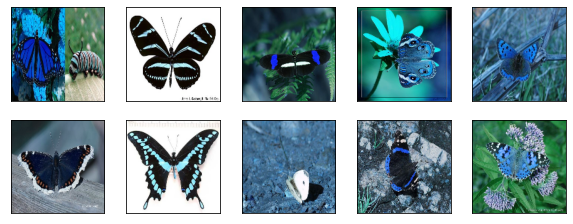

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Images[i])
plt.show()

## **3. Preprocesamiento de las imágenes**

In [ ]:
# Utilice el generador de datos de imágenes para importar las imágenes del conjunto de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#sin voltear y hacer zoom para la base de datos de prueba

In [ ]:
# Asegúrese de proporcionar el mismo tamaño de destino inicializado para el tamaño de la imagen
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CarpetaDatos/butterflies/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 592 images belonging to 10 classes.


In [ ]:
print (len(training_set))

19


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CarpetaDatos/butterflies/validate',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 169 images belonging to 10 classes.


## **4. Configurar la transferencia del conocimiento**

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Congelamos las últimas 15 capas 
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

##**5. Compilar el nuevo modelo**

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

### **6. Entrenar el nuevo modelo mostrando el tiempo total de entrenamiento**

In [ ]:
# ajustar el  modelo
# Ejecuta la celda. Llevará algún tiempo ejecutar
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/7
19/19 [==============================] - 675s 35s/step - loss: 1.0033 - accuracy: 0.6639 - val_loss: 0.2551 - val_accuracy: 0.9112
Epoch 2/7
19/19 [==============================] - 12s 626ms/step - loss: 0.2001 - accuracy: 0.9409 - val_loss: 0.0889 - val_accuracy: 0.9822
Epoch 3/7
19/19 [==============================] - 12s 626ms/step - loss: 0.0878 - accuracy: 0.9679 - val_loss: 0.1019 - val_accuracy: 0.9704
Epoch 4/7
19/19 [==============================] - 12s 629ms/step - loss: 0.0674 - accuracy: 0.9780 - val_loss: 0.0891 - val_accuracy: 0.9763
Epoch 5/7
19/19 [==============================] - 12s 646ms/step - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0503 - val_accuracy: 0.9822
Epoch 6/7
19/19 [==============================] - 12s 647ms/step - loss: 0.0287 - accuracy: 0.9932 - val_loss: 0.0548 - val_accuracy: 0.9882
Epoch 7/7
19/19 [==============================] - 12s 626ms/step - loss: 0.0322 - accuracy: 0.9932 - val_loss: 0.0249 - val_accuracy: 0.9941


## **7. Evaluar el desempeño del modelo**

In [ ]:
model.evaluate_generator(test_set, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.02491394616663456, 0.9940828680992126]

##**8. Guardar el modelo de aprendizaje por transferencia para fines de predicción fuera de línea**


In [ ]:
from tensorflow.keras.models import load_model

model.save('modelmariposasInceptionV3.h5')

##**9. Mostrar las gráficas siguientes:**

Text(0, 0.5, 'Loss')

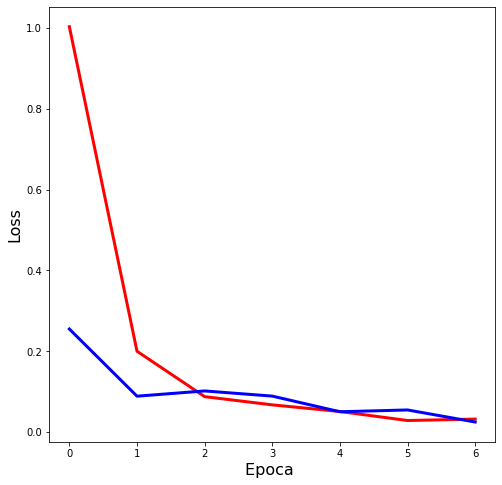

In [ ]:
plt.figure(figsize=[8,8])
plt.plot(r.history['loss'],'red',linewidth=3.0)
plt.plot(r.history['val_loss'],'blue', linewidth=3.0)
plt.xlabel('Epoca ',fontsize=16)
plt.ylabel('Loss',fontsize=16)

Text(0, 0.5, 'Accuracy')

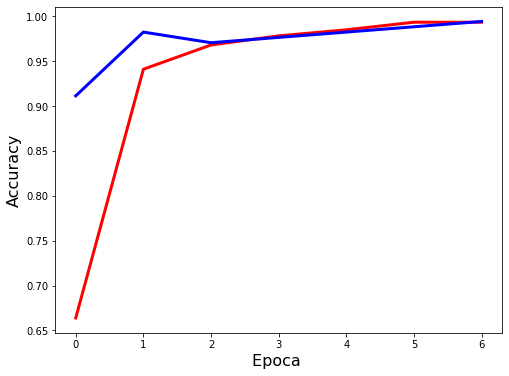

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(r.history['accuracy'],'red',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'blue',linewidth=3.0)
plt.xlabel('Epoca ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)

## **10. Validar el modelo**

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 5, 5, 0, 5, 3, 0, 4, 4, 0, 5, 0, 8, 1, 5, 6, 3, 6, 7, 5, 6, 1,
       1, 2, 7, 0, 1, 0, 1, 0, 6, 9, 5, 0, 9, 3, 6, 3, 8, 6, 1, 7, 8, 3,
       5, 7, 6, 3, 9, 0, 5, 0, 0, 3, 1, 4, 8, 9, 4, 8, 5, 2, 0, 9, 5, 7,
       0, 8, 3, 5, 8, 8, 7, 2, 2, 0, 4, 7, 4, 3, 0, 9, 9, 6, 3, 1, 5, 9,
       4, 1, 0, 5, 4, 1, 4, 8, 5, 3, 9, 7, 2, 8, 4, 1, 0, 3, 9, 7, 4, 4,
       9, 7, 5, 8, 6, 8, 8, 4, 3, 9, 4, 2, 1, 5, 6, 2, 2, 3, 2, 6, 4, 1,
       8, 8, 6, 5, 9, 3, 8, 3, 4, 1, 6, 2, 1, 9, 8, 2, 6, 7, 2, 6, 1, 4,
       5, 9, 1, 6, 6, 1, 6, 9, 2, 3, 4, 8, 3, 4, 5])